# Population Prediction

### Luis Garduno

## 1. Load Dataset

Datasets [Kaggle]: [__International Database (IDB)__](https://www2.census.gov/programs-surveys/international-programs/about/idb/idbzip.zip)

Question Of Interest : Predict the population of earth in 2122.
    






In [1]:
import numpy as np
import pandas as pd

# Load dataset into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/luisegarduno/MachineLearning_Projects/master/data/idb5yr.all', delimiter='|', encoding='ISO-8859-1')
print("--> Columns:", df.columns.values)

--> Columns: ['#YR' 'TFR' 'SRB' 'RNI' 'POP95_99' 'POP90_94' 'POP85_89' 'POP80_84'
 'POP75_79' 'POP70_74' 'POP65_69' 'POP60_64' 'POP5_9' 'POP55_59'
 'POP50_54' 'POP45_49' 'POP40_44' 'POP35_39' 'POP30_34' 'POP25_29'
 'POP20_24' 'POP15_19' 'POP10_14' 'POP100_' 'POP0_4' 'POP' 'NMR' 'NAME'
 'MR1_4' 'MR0_4' 'MPOP95_99' 'MPOP90_94' 'MPOP85_89' 'MPOP80_84'
 'MPOP75_79' 'MPOP70_74' 'MPOP65_69' 'MPOP60_64' 'MPOP5_9' 'MPOP55_59'
 'MPOP50_54' 'MPOP45_49' 'MPOP40_44' 'MPOP35_39' 'MPOP30_34' 'MPOP25_29'
 'MPOP20_24' 'MPOP15_19' 'MPOP10_14' 'MPOP100_' 'MPOP0_4' 'MPOP' 'MMR1_4'
 'MMR0_4' 'IMR_M' 'IMR_F' 'IMR' 'GRR' 'GR' 'FPOP95_99' 'FPOP90_94'
 'FPOP85_89' 'FPOP80_84' 'FPOP75_79' 'FPOP70_74' 'FPOP65_69' 'FPOP60_64'
 'FPOP5_9' 'FPOP55_59' 'FPOP50_54' 'FPOP45_49' 'FPOP40_44' 'FPOP35_39'
 'FPOP30_34' 'FPOP25_29' 'FPOP20_24' 'FPOP15_19' 'FPOP10_14' 'FPOP100_'
 'FPOP0_4' 'FPOP' 'FMR1_4' 'FMR0_4' 'GENC' 'FIPS' 'E0_M' 'E0_F' 'E0' 'CDR'
 'CBR' 'ASFR45_49' 'ASFR40_44' 'ASFR35_39' 'ASFR30_34' 'ASFR25_29'
 'ASFR

-------------------------------------
  
## 2. Data Understanding

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Data Description

In [2]:
# Make year column easier to understand
df.rename(columns={'#YR':'YEAR'}, inplace=True)

# Remove every column except for year & population
for col in df.columns.values:
    if col != 'YEAR' and col != 'POP':
        df.drop(col, axis=1, inplace=True)

# Group by year & get sum
df_yr = df.groupby(by='YEAR')
df_yr = df_yr['POP'].sum()

# Create a new dataframe with new data
pop_sum = []
for i in range(1951, 2023):
    pop_sum.append(df_yr[i])
df_pop = pd.DataFrame({'YEAR': list(range(1951, 2023)), 'POP': pop_sum})

print("--> Current Population:", df_pop['POP'][71], "\n")
df_pop.tail(5)

--> Current Population: 7905336896 



,YEAR,POP
67,2018,7597066210
68,2019,7676686052
69,2020,7756873419
70,2021,7831718605
71,2022,7905336896


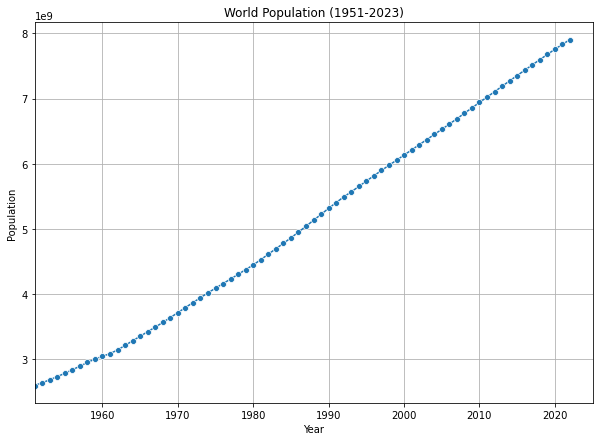

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(10,7))
plt.grid()
ax = sns.lineplot(data=df_pop, x='YEAR', y='POP', marker='o', dashes=False)
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('World Population (1951-2023)')
plt.xlim(1951, 2025)

plt.show()

## 3. Normalize

Derived the formula for calculating the optimal values of the regression weights:

$$ w = (X^TX)^{-1}X^Ty $$

where $X$ is the matrix of values with a bias column of ones appended onto it.
For the population dataset one could construct this $X$ matrix by stacking a column of ones onto the `df_pop.YEAR` matrix. 

$$ X=\begin{bmatrix}
         & \vdots &        &  1 \\
        \dotsb & \text{ds.data} & \dotsb &  \vdots\\
         & \vdots &         &  1\\
     \end{bmatrix}
$$

In [4]:
if 'POP' in df_pop:
    y = df_pop['POP'].values
    del df_pop['POP']
    X = df_pop.to_numpy()
    
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression().fit(X,y)
#print('model coefficients are : ', reg.coef_)
#print('model intercept is : ', reg.intercept_)

In [5]:
# Create a matrix full of ones
bias = np.ones((len(X),1))

# stack two matrices horizontally, to create a new matrix
X = np.hstack((bias, X))

w = np.linalg.inv(X.T @ X) @ X.T @ y
print("++++++++++++++ WEIGHTS +++++++++++++++++\n" + "Shape:", w.shape, "\n", pd.DataFrame(data=w))
print("\nh =", w[0], "* x + (" +str(w[1]) + ")\n")
diff = np.round(( (y - (abs(np.dot(X,w) - y))) / y ) * 100, 2)
print("============= TARGET PERCENT ACCURACY ===============\n", pd.DataFrame(data=diff))

++++++++++++++ WEIGHTS +++++++++++++++++
Shape: (2,) 
               0
0 -1.494551e+11
1  7.779070e+07

h = -149455085136.247 * x + (77790702.83491787)

============= TARGET PERCENT ACCURACY ===============
         0
0   89.20
1   90.73
2   92.10
3   93.32
4   94.38
..    ...
67  99.07
68  99.06
69  99.04
70  99.08
71  99.14

[72 rows x 1 columns]
